<a href="https://colab.research.google.com/github/Siphesihle-sishi/NAML-Assignment1/blob/master/assignment1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import scipy.stats as sts
dist = sts.distributions
import arviz as az
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
#Question 1
def f(x):
    return np.cos(2 * np.pi * x)

In [5]:
np.random.seed(250)
x = np.linspace(0,45*np.pi, 10)
f(x)

array([ 1.        , -0.2610643 , -0.86369086,  0.71202201,  0.4919238 ,
       -0.9688695 ,  0.01395068,  0.96158545, -0.51602195, -0.69215562])

In [6]:
#Question 2
ϵ = np.random.normal(0,12, 10)
y = f(x) + ϵ
y

array([ -7.40145926, -10.80169995,  14.41448077, -17.66185388,
        16.85475036,   9.83742423, -21.56305495,  11.38934437,
         7.01138035,  14.38806211])

In [7]:
#Question 3
p0 = np.polyfit(x,y,1)
p1 = np.polyfit(x,y,2)
p2 = np.polyfit(x,y,3)
p3 = np.polyfit(x,y,4)
p4 = np.polyfit(x,y,5)
p5 = np.polyfit(x,y,6)
p6 = np.polyfit(x,y,7)
p7 = np.polyfit(x,y,8)
p8 = np.polyfit(x,y,9)
p9 = np.polyfit(x,y,10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


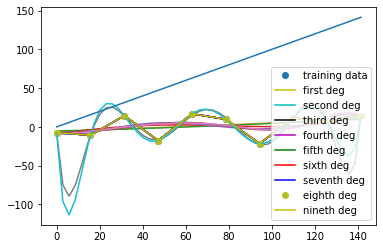

<Figure size 3240x1440 with 0 Axes>

In [8]:
#Question 4
x1 = np.linspace(0,45*np.pi)
y1 = np.polyval(p0,x1)

x2= np.linspace(0,45*np.pi)
y2 = np.polyval(p1,x2)

x3 = np.linspace(0,45*np.pi)
y3 = np.polyval(p3,x3)

x4 = np.linspace(0,45*np.pi)
y4 = np.polyval(p4,x4)

x5 = np.linspace(0,45*np.pi)
y5 = np.polyval(p5,x5)

x6 = np.linspace(0,45*np.pi)
y6 = np.polyval(p6,x2)

x7 = np.linspace(0,45*np.pi)
y7 = np.polyval(p7,x2)

x8 = np.linspace(0,45*np.pi)
y8 = np.polyval(p8,x8)

x9 = np.linspace(0,45*np.pi)
y9 = np.polyval(p9,x9)

plt.plot(x,y,'o', label= 'training data')

plt.plot(x,y,'y', label = 'first deg')
plt.plot(x1,y1)
plt.plot(x,y,'c', label = 'second deg')
plt.plot(x2,y2)

plt.plot(x,y,'k', label = 'third deg')
plt.plot(x3,y3)
plt.plot(x,y,'m', label = 'fourth deg')
plt.plot(x4,y4)

plt.plot(x,y,'g', label = 'fifth deg')
plt.plot(x5,y5)
plt.plot(x,y,'r', label ='sixth deg')
plt.plot(x6,y6)

plt.plot(x,y,'b', label = 'seventh deg')
plt.plot(x7,y7)
plt.plot(x,y,'o', label = 'eighth deg')
plt.plot(x8,y8)

plt.plot(x,y,'y', label = 'nineth deg')
plt.plot(x9,x9)
plt.legend()
plt.figure(figsize = (45,20))
plt.show()

In [9]:
#Question 5
d_dict = {'p0':p0, 'p1':p1, 'p2':p2, 'p3':p3, 'p4':p4, 'p5':p5, 'p6':p6, 'p7':p7, 'p8':p8,'p9':p9}
min_length = 10

df = pd.DataFrame({k:pd.Series(v[:min_length]) for k, v in d_dict.items()})
print(df)

         p0        p1         p2  ...            p7            p8            p9
0  0.110714  0.000298   0.000049  ...  6.763665e-12 -3.805120e-14 -3.077171e-16
1 -6.179189  0.068521  -0.010083  ... -3.833281e-09  3.097079e-11  1.794612e-13
2       NaN -5.295499   0.625385  ...  8.867871e-07 -1.030158e-08 -3.508495e-11
3       NaN       NaN -10.077046  ... -1.076156e-04  1.829564e-06  9.689129e-10
4       NaN       NaN        NaN  ...  7.316832e-03 -1.890121e-04  6.442056e-07
5       NaN       NaN        NaN  ... -2.746386e-01  1.154062e-02 -1.097569e-04
6       NaN       NaN        NaN  ...  5.161524e+00 -4.017439e-01  8.195454e-03
7       NaN       NaN        NaN  ... -3.611743e+01  7.156456e+00 -3.165952e-01
8       NaN       NaN        NaN  ... -7.417994e+00 -4.832730e+01  5.985605e+00
9       NaN       NaN        NaN  ...           NaN -7.401459e+00 -4.182610e+01

[10 rows x 10 columns]


In [12]:
rms_1 = sqrt(mean_squared_error(y, y1))
print('RMS for polynomial of degree 1 is:',rms_1 )

rms_2 = sqrt(mean_squared_error(y, y2))
print('RMS for polynomial of degree 2 is:',rms_2 )

rms_3 = sqrt(mean_squared_error(y, y3))
print('RMS for polynomial of degree 3 is:',rms_3 )

rms_4 = sqrt(mean_squared_error(y, y4))
print('RMS for polynomial of degree 4 is:',rms_4 )

rms_5 = sqrt(mean_squared_error(y, y5))
print('RMS for polynomial of degree 5 is:',rms_5 )

rms_6 = sqrt(mean_squared_error(y, y6))
print('RMS for polynomial of degree 6 is:',rms_6 )

rms_7 = sqrt(mean_squared_error(y, y7))
print('RMS for polynomial of degree 7 is:',rms_7 )

ValueError: ignored

In [0]:
#Question 7
# Let the coefficents of the polynomial of third deg be:
β = p3 
α = p3[0]

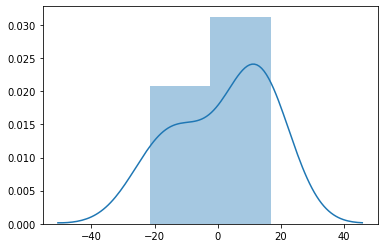

In [14]:
sns.distplot(y)

In [15]:
with pm.Model() as Polynomial:
    # Priors for unknown model parameters
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10,shape =4)
    #σ = pm.Normal('σ',sd=12)
    
    
    # Expected value of outcome
    μ = α + β[1]*x1 + β[2]*x2 + β[3]*x3
    
    # Likelihood (sampling distribution) of observations
    y_ = pm.Normal('y_', mu=μ, observed=y)
    
    trace = pm.sample(2000, tune=1000)

ValueError: ignored

In [16]:
az.plot_trace(trace)

NameError: ignored

In [17]:
az.summary(y)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
x,1.647,14.513,-21.563,16.855,4.59,3.345,10.0,10.0,10.0,10.0,NaN
